In [0]:
from multi_grid import func, solution,create_B, smooth,residual,restriction,interpolation,vCycle

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from timeit import default_timer as timer

This is notebook is for a simple implementation of multigrid method which is used to solve partial differential equations. The equation that we are solving is Poisson's equation 
$$
\frac{\partial^2 u(x,y)}{\partial x^2} +\frac{\partial^2 u(x,y)}{\partial y^2} =  b(x,y)
$$
where 
$$
b(x,y) = -2 \pi^2 \sin(\pi x) \sin(\pi y).
$$
The domain of the problem is a square 
$$
\Omega:= [0, 1] \times [0, 1],
$$
and the boundary conditions are Dirichlet type boundary conditions
$$
u(x,y) = 0, \quad (x,y) \in \Gamma,
$$
where $\Gamma:= \{ (0,y) \bigcup (1,y) \bigcup (x,0) \bigcup (x,1) \}$. The analytical solution of this particular elliptic partial differential equation with the the aforementioned boundary conditions is given by:
$$
u(x,y) = \sin(\pi x) \sin(\pi y), \quad (x,y) \in \Omega.
$$

To solve this problem numerically, the domain $\Omega$ is discretised by a uniform grid of $N_x$ points in the x-axis direction and $N_y$ points along the y-axis. For this particular test case, $511 \times 511$ points are used. 

In [0]:
Nx = 511; Ny = 511
dims = [Nx, Ny]

Defining a matrix that stores the values of the function $B(x,y)$ on a discretised grid. 

In [0]:
B = create_B(dims, func)

Initialising a matrix $\mathrm{U}$ to store the values of the approximated solution of the Poisson's equation. The initial guess used is that all the values, except the boundary conditions, are chosen to be $1$.

In [0]:
U = np.zeros((dims[0]+2, dims[1]+2))
U[1:-1, 1:-1] = 1.0

Next defining the norm of the residual, which plays the role of the error, and iteration counter. Both variables are used as a stopping criteria for the multigrid solver. 

In [0]:
res_mg = 1.0; counter = 0;

The following list is used to specify the number of iterations used in the pre-smoothing and post-smoothing steps.

In [0]:
steps = [2,2]

Now, the main iteration loop where multigrid method is applied. V-cycle variant of multigrid is used for this particular example. 

In [0]:
start = timer()
tol = 1e-5;
max_iter = 2000
while (res_mg > tol and counter < max_iter):
  counter += 1
  U, res_mg = vCycle(U, B, dims, steps)
end = timer()

The time (in seconds) it took to complete solving the partial differential equation is:

In [34]:
print( end - start)

24.0970151424


The numerical solution looks like:

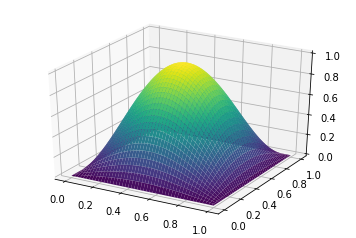

In [35]:
x = y = np.linspace(0.0, 1.0, Nx+2)
X, Y = np.meshgrid(x, y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, U, cmap='viridis', edgecolor='none')